In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
!pip install pyarrow 

In [3]:
df_train=pd.read_parquet('train.parquet')
df_train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [4]:
df_train.describe()

,id,label
count,80000.000000,80000.000000
mean,50107.893162,0.277250
std,28857.649778,0.447644
min,0.000000,0.000000
25%,25122.500000,0.000000
50%,50146.500000,0.000000
75%,75064.250000,1.000000
max,99999.000000,1.000000


In [5]:
df_train.isnull().sum()

id        0
dates     0
values    0
label     0
dtype: int64

In [6]:
id_counts=df_train['id'].value_counts()
id_counts.describe()

count    80000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: count, dtype: float64

In [7]:
sample_ids=df_train['id'].sample(1000,random_state=42)
sample_data=df_train[df_train['id'].isin(sample_ids)]
sample_data

,id,dates,values,label
39,92613,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.65, -0.65, -0.65, -0.65, -0.65, -0.65, -0....",0.0
253,15761,"[2016-04-01, 2016-05-01, 2016-06-01, 2016-07-0...","[2.1, 1.52, 1.03, -0.48, -0.82, -0.56, -0.63, ...",0.0
278,29495,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-0.27, -1.22, -0.64, -2.98, -1.04, -2.27, -0....",0.0
313,21055,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.59, -0.28, -0.19, 0.27, 1.41, 0.33, 2.34, ...",0.0
323,42124,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.75, 1.97, -1.15, -0.89, -0.75, -0.22, -1.3...",1.0
...,...,...,...,...
79845,99396,"[2019-02-01, 2019-03-01, 2019-04-01, 2019-05-0...","[0.77, 1.02, 0.17, -1.9, -0.52, -1.18, 0.18, -...",0.0
79893,2601,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-2.06, -0.3, 1.17, 0.3, -2.2, -0.23, -0.65, -...",0.0
79909,41069,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[0.65, 0.82, 0.17, 1.09, 1.41, 2.85, 2.73, 1.6...",0.0
79931,46925,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.03, 0.66, -0.47, -1.37, -1.67, -1.1, -1.03,...",0.0


In [8]:
rand_sample_ids=sample_data['id'].sample(5,random_state=42)

for sample in rand_sample_ids:
    plt.figure(figsize = (8,5))
    sample_data = df_train[df_train['id'] == sample]
    
    dates = sample_data['dates'].values[0]  # Здесь мы берем первый элемент (список)
    values = sample_data['values'].values[0]  # Здесь мы берем первый элемент (список)
    
    plt.plot(dates,values,marker='o')
    plt.xlabel('time')
    plt.ylabel('values')
    plt.title(f'Times series for id number {sample} ')

In [9]:
expanded_rows = []
for _, row in df_train.iterrows():
    id_value = row['id']
    values = row['values']
    expanded_rows.extend([[id_value, value] for value in values])

# Создаем новый DataFrame из развернутых данных
df_expanded = pd.DataFrame(expanded_rows, columns=['id', 'values'])

# Выполняем агрегацию и добавляем новые столбцы в оригинальный DataFrame
df_train['mean'] = df_train['id'].map(df_expanded.groupby('id')['values'].mean())
df_train['std'] = df_train['id'].map(df_expanded.groupby('id')['values'].std())
df_train['min'] = df_train['id'].map(df_expanded.groupby('id')['values'].min())
df_train['max'] = df_train['id'].map(df_expanded.groupby('id')['values'].max())
df_train

,id,dates,values,label,mean,std,min,max
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,0.023710,1.348189,-4.840000,3.49
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,-0.310777,1.573923,-3.534409,2.92
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,-0.046042,1.076293,-1.950000,2.61
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,-0.130000,1.170457,-2.220000,2.49
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,-0.270536,1.282027,-2.500000,2.87
...,...,...,...,...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,0.163818,1.315984,-3.640000,2.56
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,-0.112555,1.228053,-2.590000,2.16
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,-0.201373,1.194318,-2.890000,2.27
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,-0.075397,1.503232,-2.850000,3.11


In [10]:
melted_df=df_train.melt(id_vars=['id'],value_vars=['mean','std','min','max'],var_name='Statistic', value_name='Value')
melted_df

,id,Statistic,Value
0,19114,mean,0.023710
1,22769,mean,-0.310777
2,76935,mean,-0.046042
3,66297,mean,-0.130000
4,2191,mean,-0.270536
...,...,...,...
319995,71474,max,2.560000
319996,36908,max,2.160000
319997,63517,max,2.270000
319998,94731,max,3.110000


/tmp/ipykernel_9907/1878402843.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Statistic')


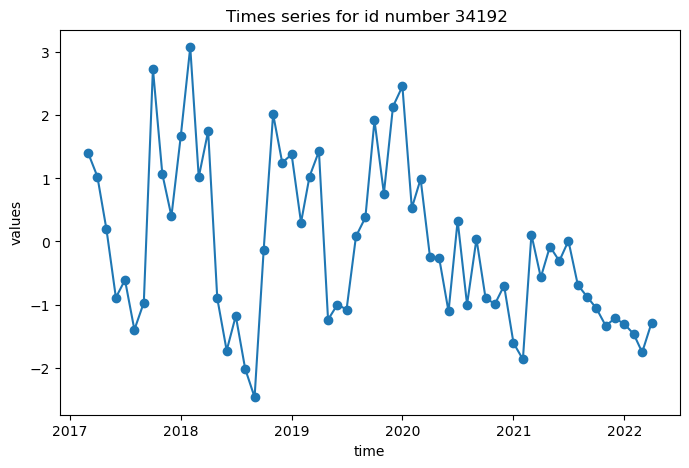

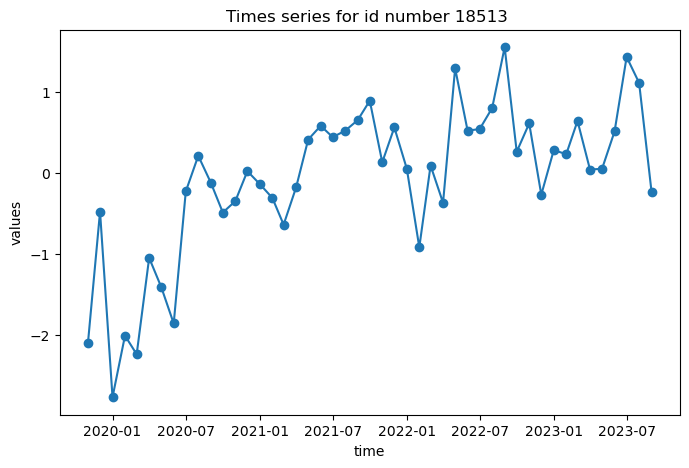

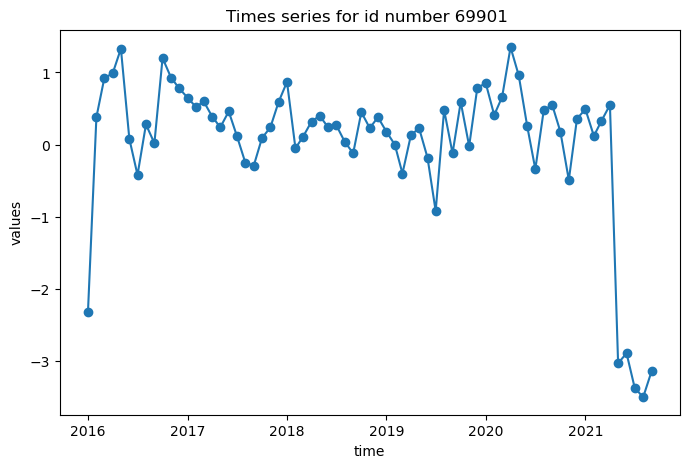

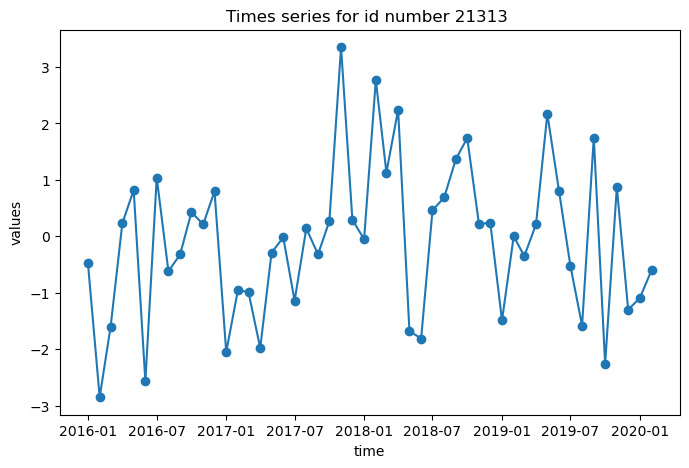

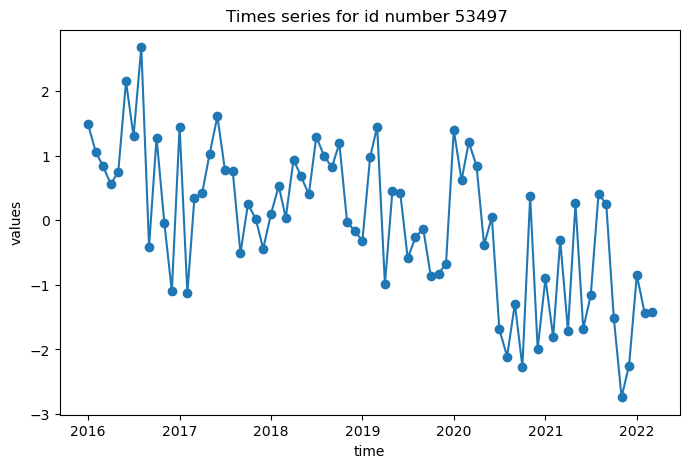

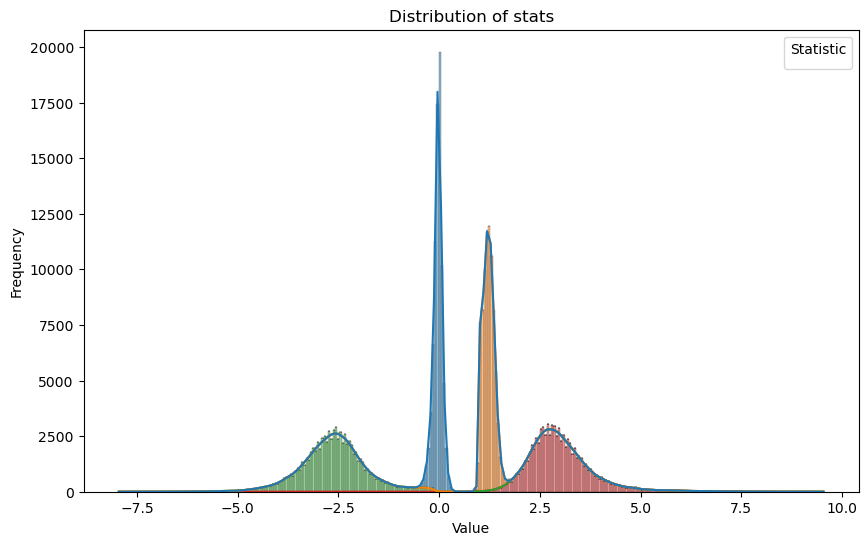

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=melted_df,x='Value',hue='Statistic',multiple='stack',kde=True)
plt.title('Distribution of stats')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Statistic')
plt.show()

Зеленый это минимумы, синий - среднее, оранжевый - среднее квадратичное отклонение, красное - максимумы.
Видим, что все статистические признаки похожи на нормальное распределение. 

In [12]:
class_distribution=df_train['label'].value_counts()
class_distribution

label
0.0    57820
1.0    22180
Name: count, dtype: int64

Посчитаем среднее и среднее квадратичное отклонение признаков.

In [13]:
class_stats_mean = df_train.groupby('label')[['mean','std','min','max']].mean()
class_stats_std = df_train.groupby('label')[['mean','std','min','max']].std()
class_stats_std

,mean,std,min,max
label,,,,
0.0,0.091589,0.131900,0.796043,0.788103
1.0,0.108215,0.155273,0.910302,0.920570


In [14]:
class_stats_mean

,mean,std,min,max
label,,,,
0.0,0.00058,1.219047,-2.599711,3.015081
1.0,-0.11701,1.237594,-2.667072,2.999360


In [15]:
class_stats_std

,mean,std,min,max
label,,,,
0.0,0.091589,0.131900,0.796043,0.788103
1.0,0.108215,0.155273,0.910302,0.920570


In [16]:
df_train

,id,dates,values,label,mean,std,min,max
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,0.023710,1.348189,-4.840000,3.49
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,-0.310777,1.573923,-3.534409,2.92
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,-0.046042,1.076293,-1.950000,2.61
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,-0.130000,1.170457,-2.220000,2.49
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,-0.270536,1.282027,-2.500000,2.87
...,...,...,...,...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,0.163818,1.315984,-3.640000,2.56
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,-0.112555,1.228053,-2.590000,2.16
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,-0.201373,1.194318,-2.890000,2.27
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,-0.075397,1.503232,-2.850000,3.11


In [17]:
from scipy.stats import ttest_ind

class_0 = df_train[df_train['label'] == 0]['mean'].dropna()
class_1 = df_train[df_train['label'] == 1]['mean'].dropna()
t_stat, p_val = ttest_ind(class_0, class_1)
print(f'T-statistic: {t_stat}, p-value: {p_val}')

T-statistic: 154.16859623514367, p-value: 0.0


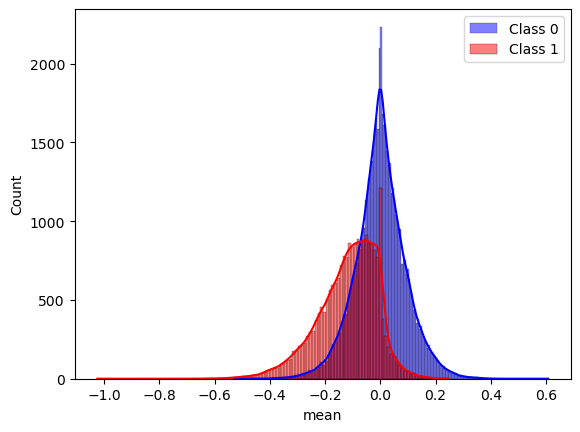

In [18]:
sns.histplot(class_0, color='blue', label='Class 0', kde=True)
sns.histplot(class_1, color='red', label='Class 1', kde=True)
plt.legend()
plt.show()

In [19]:
from scipy.stats import levene

# Тест на равенство дисперсий
stat, p = levene(class_0, class_1)
print(f"Levene test statistic: {stat}, p-value: {p}")


Levene test statistic: 935.2762041667305, p-value: 3.200386907985316e-204


Подсчет бустреп доверительного интервала.

In [20]:
import numpy as np

def bootstrap_mean_diff(class_0, class_1, n_bootstraps=10000):
    boot_diffs = []
    for _ in range(n_bootstraps):
        boot_0 = np.random.choice(class_0, size=len(class_0), replace=True)
        boot_1 = np.random.choice(class_1, size=len(class_1), replace=True)
        boot_diffs.append(np.mean(boot_0) - np.mean(boot_1))
    return np.percentile(boot_diffs, [2.5, 97.5])

ci = bootstrap_mean_diff(class_0, class_1)
print(f"95% Confidence interval for mean difference: {ci}")


95% Confidence interval for mean difference: [0.11596245 0.11915021]


Доверительный интервал получился очень маленьким, значит классы действительно отличаются друг от друга.

Обучение модели. Как модель для классификации выбрал случайный лес. Как целевая метрика выбрана ROC-AUC.  

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

def calculate_statistics(df):
    grouped = df.groupby('id')['values'].apply(list)
    stats = grouped.apply(lambda x: pd.Series({
        'mean': np.nanmean(x),  # Вычисляем среднее, игнорируя NaN
        'std': np.nanstd(x),    # Вычисляем стандартное отклонение, игнорируя NaN
        'min': np.nanmin(x),     # Минимум
        'max': np.nanmax(x)      # Максимум
    }))
    return stats

# Вычисляем статистики
stats_df = calculate_statistics(df_train)
stats_df.reset_index(inplace=True)

# Объединяем статистики с метками
stats_df['label'] = df_train.groupby('id')['label'].first().values

# Функция для замены NaN на медиану
def impute_nan_with_median(table):
    for col in table.columns:
        if table[col].dtype in ['float64', 'int64']:  # Проверяем, что столбец числовой
            table[col] = table[col].fillna(table[col].median())
    return table

# Заменяем NaN на медиану
table = impute_nan_with_median(stats_df)

# Определяем признаки и метки
feature_columns = ['mean', 'std']
X = table[feature_columns]
y = table['label']

# Обучаем модель
grid={
    'n_estimators': [30,70,100],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None,'balanced']
}

rf = RandomForestClassifier(random_state=42)
model=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='roc_auc')
model.fit(X, y)

/tmp/ipykernel_9907/1779876023.py:8: RuntimeWarning: Mean of empty slice
  'mean': np.nanmean(x),  # Вычисляем среднее, игнорируя NaN
/home/timofey/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_9907/1779876023.py:10: RuntimeWarning: All-NaN axis encountered
  'min': np.nanmin(x),     # Минимум
/tmp/ipykernel_9907/1779876023.py:11: RuntimeWarning: All-NaN axis encountered
  'max': np.nanmax(x)      # Максимум


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [30, 70, 100]},
             scoring='roc_auc')

In [22]:
import joblib

joblib.dump(model, 'random_forest_model_linux.joblib')

['random_forest_model_linux.joblib']